In [4]:
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

In [3]:
import tensorflow as tf

In [20]:
import os
list1=os.listdir(r"C:\Users\91996\Desktop\Coin\classification_dataset\all")

In [24]:
y=[]
for i in list1:
    y.append(i.split("_")[0])

In [25]:
print(set(y))

{'5', '50', '100', '25', '10'}


In [26]:
import pandas as pd

In [156]:
X=[]
for i in list1:
    path=r"C://Users//91996//Desktop//Coin//classification_dataset//all//"+ str(i)
    X.append(path)

In [157]:
data=pd.DataFrame()

In [158]:
data['path']=X
data['labels']=y

In [32]:
data.isna().sum()

path      0
labels    0
dtype: int64

In [33]:
data.head()

,path,labels
0,C://Users//91996//Desktop//Coin//classificatio...,100
1,C://Users//91996//Desktop//Coin//classificatio...,100
2,C://Users//91996//Desktop//Coin//classificatio...,100
3,C://Users//91996//Desktop//Coin//classificatio...,100
4,C://Users//91996//Desktop//Coin//classificatio...,100


In [108]:
from sklearn.model_selection import train_test_split


In [153]:

from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_try=lb.fit_transform(y)

In [154]:
y_try

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [162]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [163]:
new_data=[]
import cv2
for i in data.path:
    i=cv2.imread(i)
    image=cv2.resize(i,dsize=(224,224))
    image=preprocess_input(image)
    new_data.append(image)

In [164]:
data=np.array(new_data,dtype='float32')

In [177]:
labels=np.array(y)

In [178]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
#labels=to_categorical(labels)


In [179]:
labels.shape

(3059, 5)

In [180]:
train_X,test_X,train_Y,test_Y=train_test_split(data,labels,test_size=0.20,stratify=labels,random_state=10)

In [185]:
from tensorflow.keras.layers import AveragePooling2D
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')

baseModel=MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

print(baseModel.summary())

headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(128,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='softmax')(headModel)

model=Model(inputs=baseModel.input,outputs=headModel)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [187]:



for layer in baseModel.layers:
    layer.trainable=False


print(model.summary())

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [189]:
learning_rate=0.001
Epochs=20
BS=12


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [190]:
H=model.fit(
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)

Epoch 1/20
203/203 [==============================] - 43s 211ms/step - loss: 1.3501 - accuracy: 0.4472 - val_loss: 0.9444 - val_accuracy: 0.6176
Epoch 2/20
203/203 [==============================] - 47s 232ms/step - loss: 1.0502 - accuracy: 0.5721 - val_loss: 0.8139 - val_accuracy: 0.6683
Epoch 3/20
203/203 [==============================] - 48s 237ms/step - loss: 0.9617 - accuracy: 0.6111 - val_loss: 0.7548 - val_accuracy: 0.6944
Epoch 4/20
203/203 [==============================] - 45s 222ms/step - loss: 0.8860 - accuracy: 0.6402 - val_loss: 0.7153 - val_accuracy: 0.7271
Epoch 5/20
203/203 [==============================] - 52s 256ms/step - loss: 0.8406 - accuracy: 0.6723 - val_loss: 0.6601 - val_accuracy: 0.7337
Epoch 6/20
203/203 [==============================] - 40s 196ms/step - loss: 0.8186 - accuracy: 0.6669 - val_loss: 0.5998 - val_accuracy: 0.7565
Epoch 7/20
203/203 [==============================] - 40s 197ms/step - loss: 0.8086 - accuracy: 0.6809 - val_loss: 0.5768 - val_ac

In [206]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

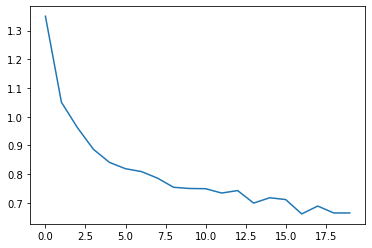

In [210]:
import matplotlib.pyplot as plt
plt.plot(H.history['loss'])

In [216]:
predict=model.predict(test_X,batch_size=BS)


In [217]:
predict=np.argmax(predict,axis=1)


In [218]:
from sklearn.metrics import classification_report

In [219]:
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

              precision    recall  f1-score   support

          10       0.88      0.70      0.78       121
         100       0.81      0.94      0.87       122
          25       0.88      0.72      0.79       121
           5       0.67      0.59      0.63       120
          50       0.72      0.95      0.82       128

    accuracy                           0.78       612
   macro avg       0.79      0.78      0.78       612
weighted avg       0.79      0.78      0.78       612

